# Naive Bayes Classification IRIS

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [15]:
#Read the data
df = pd.read_csv("IRIS.csv")
# showing the first 5 lines of the data!
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#check for null values
pd.isnull(df).sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df["species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

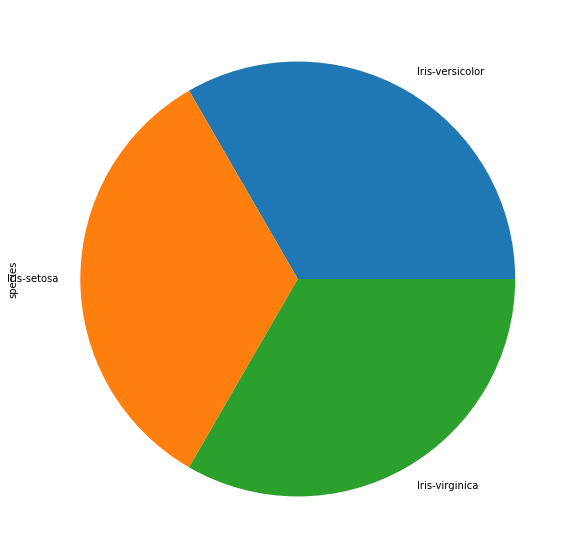

In [16]:
df["species"].value_counts().plot(kind="pie",figsize=(10,10))
df["species"].value_counts()

<AxesSubplot:>

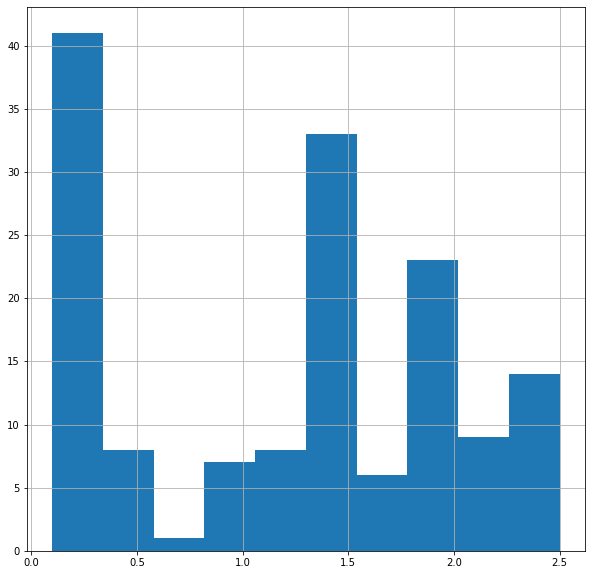

In [10]:
df["petal_width"].hist(label=" petal_width", figsize=(10,10))

<AxesSubplot:>

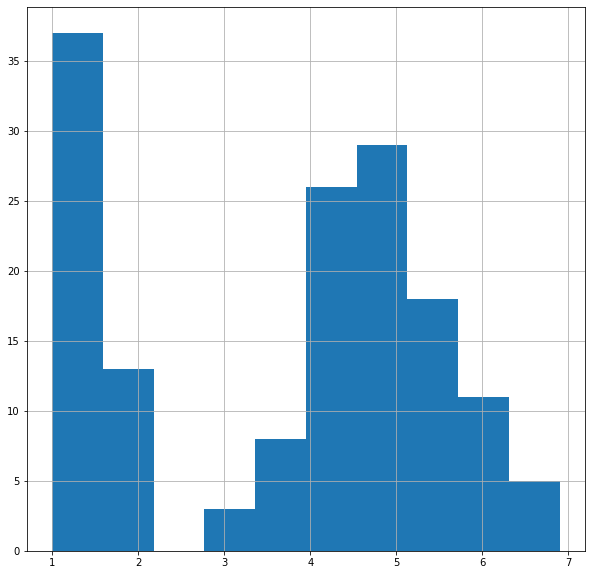

In [11]:
df["petal_length"].hist(label=" petal_length", figsize=(10,10))

<AxesSubplot:>

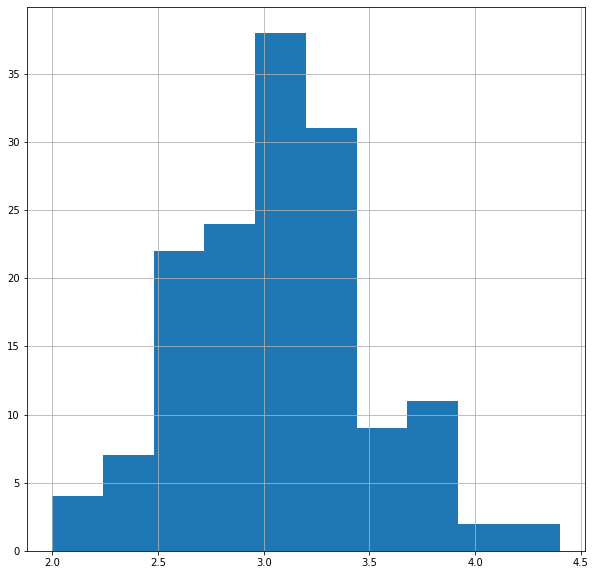

In [12]:
df["sepal_width"].hist(label=" sepal_width", figsize=(10,10))

<AxesSubplot:>

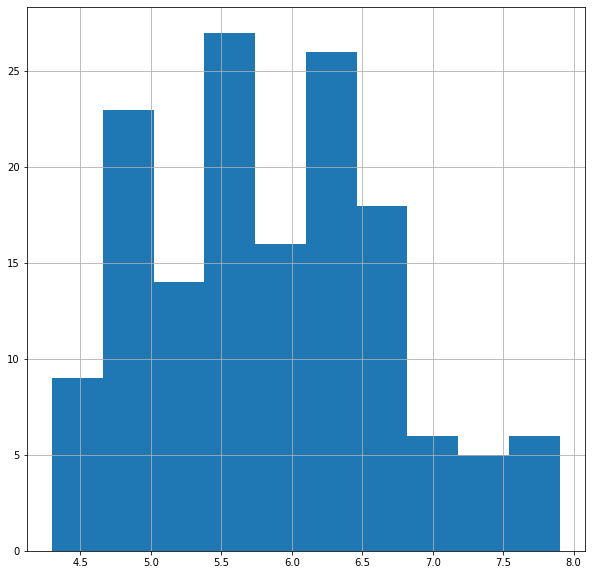

In [13]:
df["sepal_length"].hist(label=" sepal_length", figsize=(10,10))

In [18]:
# encoding "Gender" Column
df['species'].replace({'Iris-versicolor':0,'Iris-setosa':1,'Iris-virginica':2},inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


<AxesSubplot:>

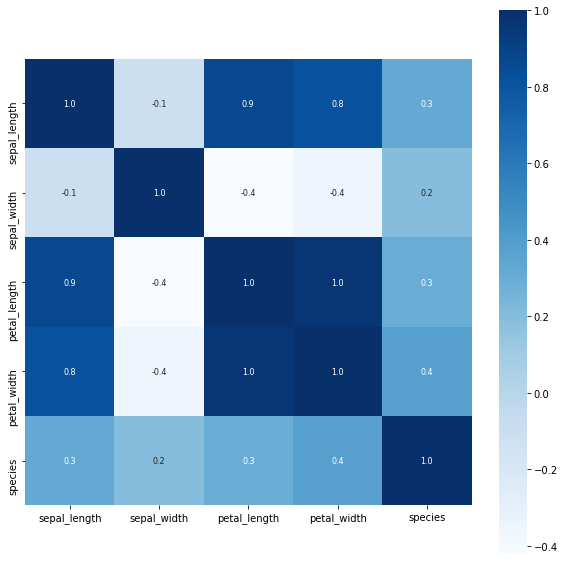

In [19]:
correlation = df.corr()
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [20]:
X = df.drop(['species'], axis=1)# features 
Y = df['species'] # target 
print(X)
print(Y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.15, random_state=0)
# Training dataset
print(X_train.shape)
print(y_train.shape)
# Testing dataset
print(X_test.shape)
print(y_test.shape)

(127, 4)
(127,)
(23, 4)
(23,)


## naive_bayes

In [22]:
model = MultinomialNB()
model.fit(X_train, y_train) # start train
# predicted output by model 
y_pred = model.predict(X_test)
# predicted = y_pred
# actual = y_test 

cm = confusion_matrix(y_pred, y_test)
print(cm)

[[ 0  0  0]
 [ 0  7  0]
 [11  0  5]]


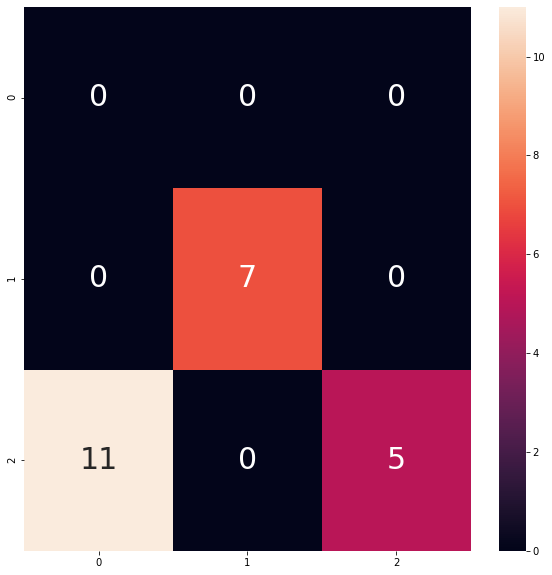

In [23]:
plt.rcParams['figure.figsize'] = (10, 10)

sns.heatmap(cm, annot = True, annot_kws = {'size':30})

sns.set_style({'xtick.bottom': True})

In [24]:
# Creating a function to report confusion metricsdef confusion_metrics (conf_matrix):# save confusion matrix and slice into four pieces   
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]   
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

# calculate mis-classification
conf_misclassification = 1- conf_accuracy

# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))    
# calculate the specificity
conf_specificity = (TN / float(TN + FP))

# calculate precision
conf_precision = (TN / float(TN + FP))    # calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))  
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Mis-Classification: {round(conf_misclassification,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')


True Positives: 7
True Negatives: 0
False Positives: 0
False Negatives: 0
--------------------------------------------------
Accuracy: 1.0
Mis-Classification: 0.0
Sensitivity: 1.0
Specificity: nan
Precision: nan
f_1 Score: nan


<ipython-input-24-a2ff3779a405>:20: RuntimeWarning: invalid value encountered in true_divide
  conf_specificity = (TN / float(TN + FP))
<ipython-input-24-a2ff3779a405>:23: RuntimeWarning: invalid value encountered in true_divide
  conf_precision = (TN / float(TN + FP))    # calculate f_1 score


## LogisticRegression

In [25]:
model = LogisticRegression()
model.fit(X_train, y_train) # start train
# predicted output by model 
y_pred = model.predict(X_test)
# predicted = y_pred
# actual = y_test 

cm = confusion_matrix(y_pred, y_test)
print(cm)

[[11  0  0]
 [ 0  7  0]
 [ 0  0  5]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


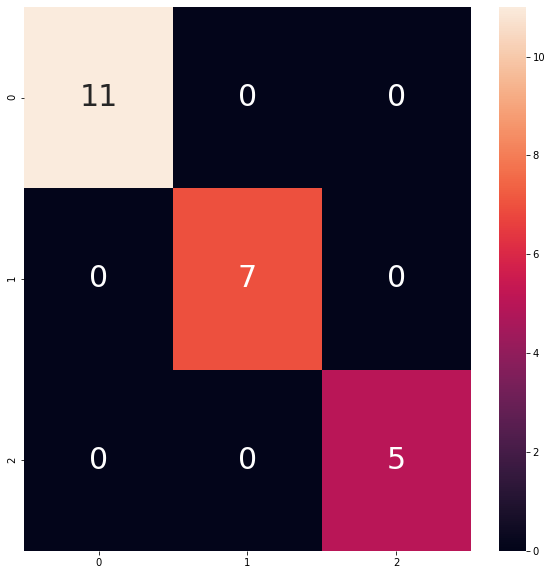

In [26]:
plt.rcParams['figure.figsize'] = (10, 10)

sns.heatmap(cm, annot = True, annot_kws = {'size':30})

sns.set_style({'xtick.bottom': True})

In [27]:
# Creating a function to report confusion metricsdef confusion_metrics (conf_matrix):# save confusion matrix and slice into four pieces   
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]   
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

# calculate mis-classification
conf_misclassification = 1- conf_accuracy

# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))    
# calculate the specificity
conf_specificity = (TN / float(TN + FP))

# calculate precision
conf_precision = (TN / float(TN + FP))    # calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))  
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Mis-Classification: {round(conf_misclassification,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')


True Positives: 7
True Negatives: 11
False Positives: 0
False Negatives: 0
--------------------------------------------------
Accuracy: 1.0
Mis-Classification: 0.0
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
f_1 Score: 1.0


## <a id='conclusions'></a>
## Conclusions:

###### LogisticRegression is the better model for this data.